<a href="https://colab.research.google.com/github/IdajiliJohnOjochegbe/Handwritten-digit-recognition-/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


# Load the MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the images to [0, 1] range
train_images, test_images = train_images / 255.0, test_images / 255.0


11490434/11490434 [==============================] - 0s 0us/step


# Explore the dataset

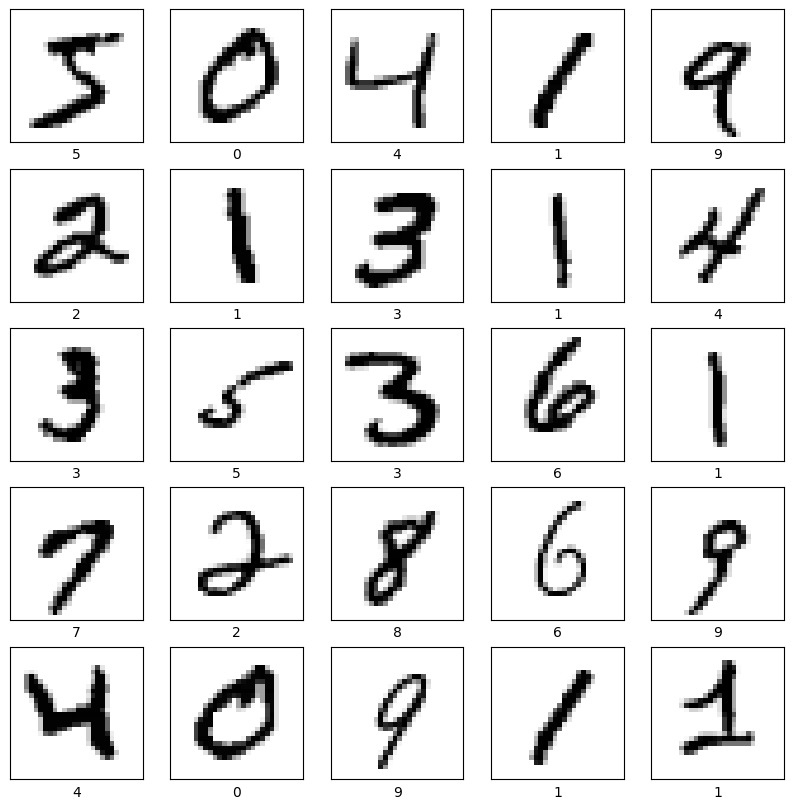

In [3]:
# Display the first 25 images from the training set and their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


# Define the Model Architecture

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# Compile the Model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model:

In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2555 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1135 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0765 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0581 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0440 - accuracy: 0.9863


# Evaluate the Model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - loss: 0.0784 - accuracy: 0.9761 - 653ms/epoch - 2ms/step

Test accuracy: 0.9761000275611877


# Make Predictions

313/313 [==============================] - 1s 2ms/step


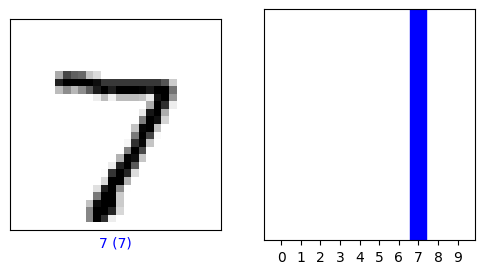

In [8]:
predictions = model.predict(test_images)

# Display the first test image, its predicted label, and the true label
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({true_label})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


# Improving the Model

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the improved model

In [10]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.3304 - accuracy: 0.8977 - val_loss: 0.0524 - val_accuracy: 0.9841
Epoch 2/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1097 - accuracy: 0.9686 - val_loss: 0.0376 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0822 - accuracy: 0.9768 - val_loss: 0.0351 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0681 - accuracy: 0.9808 - val_loss: 0.0321 - val_accuracy: 0.9903
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0593 - accuracy: 0.9837 - val_loss: 0.0289 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0547 - accuracy: 0.9852 - val_loss: 0.0276 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0494 - accuracy: 0.9862 - val_loss: 0.0248 -

# Evaluate the improved model

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 2s - loss: 0.0248 - accuracy: 0.9926 - 2s/epoch - 8ms/step

Test accuracy: 0.9926000237464905


# visualize training history

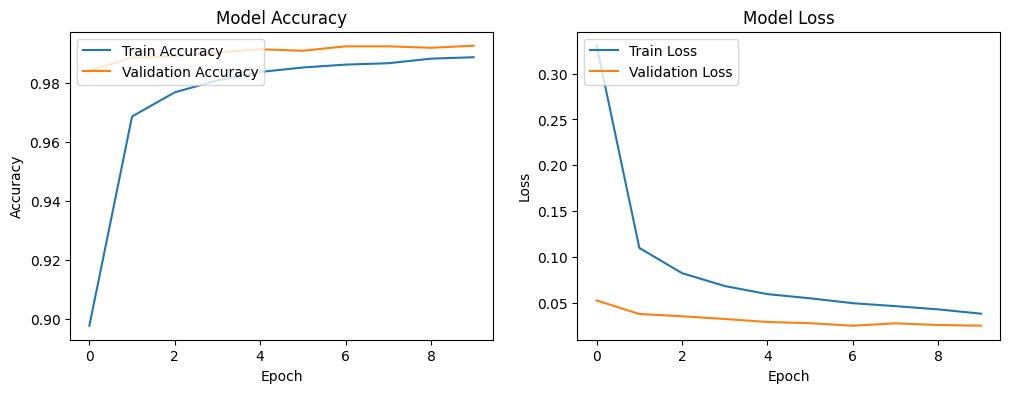

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()


# Visualize more prediction

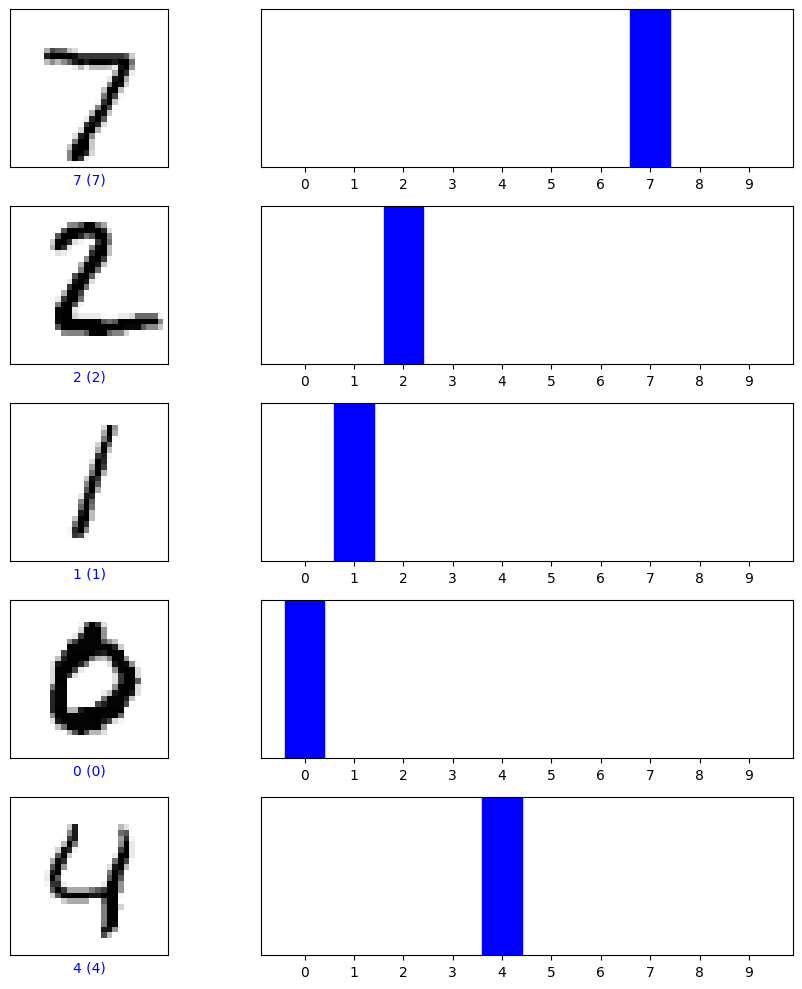

In [13]:
def plot_multiple_images(predictions, true_labels, images, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(num_images, 2, 2*i+1)
        plot_image(i, predictions[i], true_labels, images)
        plt.subplot(num_images, 2, 2*i+2)
        plot_value_array(i, predictions[i], true_labels)
    plt.tight_layout()
    plt.show()

# Example usage
plot_multiple_images(predictions, test_labels, test_images, num_images=5)
